# Analysing multiple files

We have received several files of data from the inflammation studies, and we would like to perform the same operations on each of them.

We have learned how to open files, read in the data, visualise the data, loop over contents, and make decisions based on that content.

Now we need to know how to interact with the *filesystem* to get our data files.

In [1]:
%pylab inline

import matplotlib.pyplot
import numpy as np
import os
import seaborn

Populating the interactive namespace from numpy and matplotlib


## `os.listdir()`

The `os.listdir()` function returns a list of files present in a directory. We know that our data is in the directory `'data'` so we check its contents.

In [2]:
print(os.listdir('data'))

['inflammation-01.csv', 'inflammation-02.csv', 'inflammation-03.csv', 'inflammation-04.csv', 'inflammation-05.csv', 'inflammation-06.csv', 'inflammation-07.csv', 'inflammation-08.csv', 'inflammation-09.csv', 'inflammation-10.csv', 'inflammation-11.csv', 'inflammation-12.csv', 'python-novice-inflammation-code.zip', 'python-novice-inflammation-data.zip', 'small-01.csv', 'small-02.csv', 'small-03.csv']


This can be filtered with a conditional in a `for` loop or a *list comprehension*

In [3]:
files = [f for f in os.listdir('data')]
print(files)

['inflammation-01.csv', 'inflammation-02.csv', 'inflammation-03.csv', 'inflammation-04.csv', 'inflammation-05.csv', 'inflammation-06.csv', 'inflammation-07.csv', 'inflammation-08.csv', 'inflammation-09.csv', 'inflammation-10.csv', 'inflammation-11.csv', 'inflammation-12.csv', 'python-novice-inflammation-code.zip', 'python-novice-inflammation-data.zip', 'small-01.csv', 'small-02.csv', 'small-03.csv']


The files we're interested in start with the word `'inflammation'`, so we can use the `.startswith()` function of the `string` object (all the filenames are strings) as the conditional.

In [4]:
files = [f for f in os.listdir('data') if f.startswith('inflammation')]
print(files)

['inflammation-01.csv', 'inflammation-02.csv', 'inflammation-03.csv', 'inflammation-04.csv', 'inflammation-05.csv', 'inflammation-06.csv', 'inflammation-07.csv', 'inflammation-08.csv', 'inflammation-09.csv', 'inflammation-10.csv', 'inflammation-11.csv', 'inflammation-12.csv']


## `os.path.join()`

The `os.listdir()` function only returns filenames, not the *path* (relative or absolute) to those files.

To construct a path, we can use the `os.path.join()` function. This takes directory and file names, and returns a path built from them, as a string, suitable for the underlying operating system.

In [5]:
print(os.path.join('data', 'inflammation-01.csv'))

data/inflammation-01.csv


## Visualising the data

Now we have all the tools we need to load all the inflammation data files, and visualise the mean, minimum and maximum values in an array of plots.

* We can get a list of paths to the data files with `os` and a *list comprehension*
* We can load data from a file with `np.loadtxt()`
* We can calculate summary statistics with `mp.mean()`, `np.max()`, etc.
* We can create figures with `matplotlib`, and arrays of figures with `.add_subplot()`

We can do all this in the single cell, below:

data/inflammation-01.csv


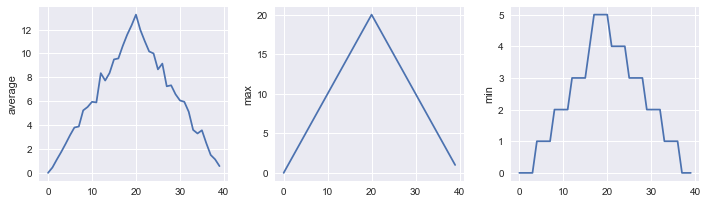

data/inflammation-02.csv


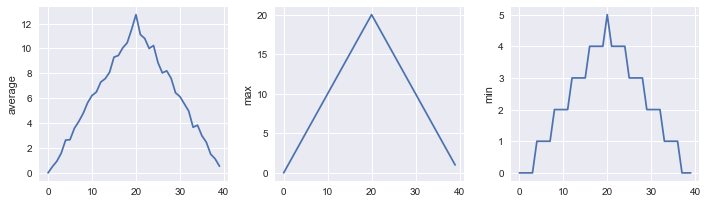

data/inflammation-03.csv


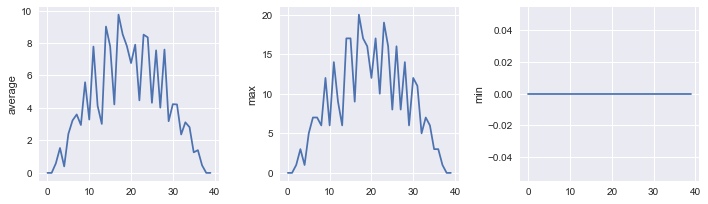

data/inflammation-04.csv


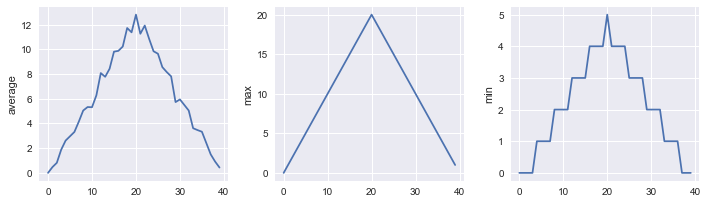

data/inflammation-05.csv


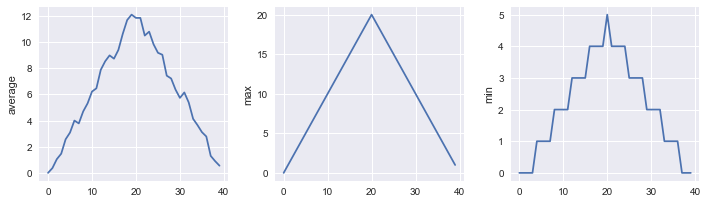

data/inflammation-06.csv


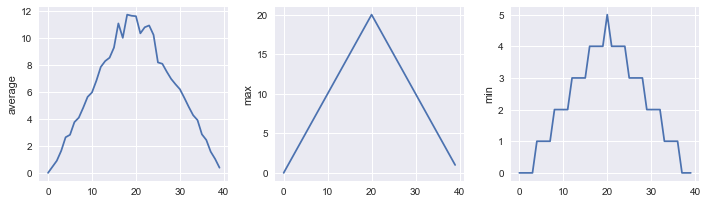

data/inflammation-07.csv


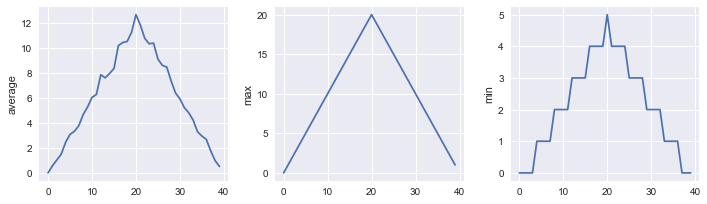

data/inflammation-08.csv


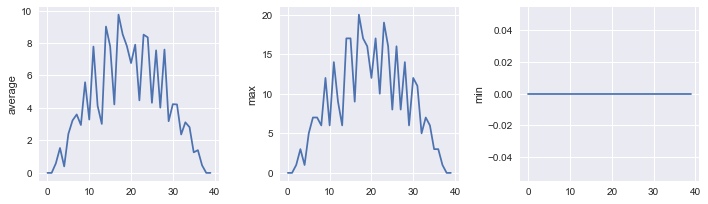

data/inflammation-09.csv


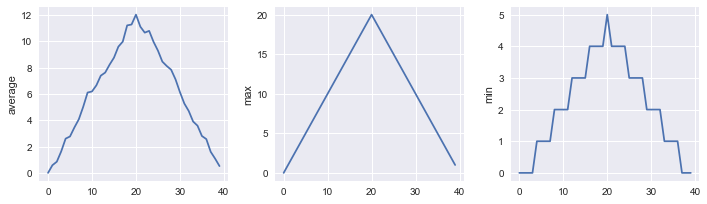

data/inflammation-10.csv


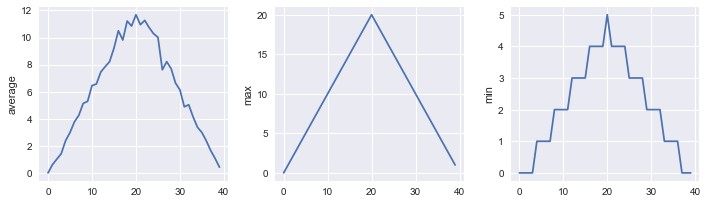

data/inflammation-11.csv


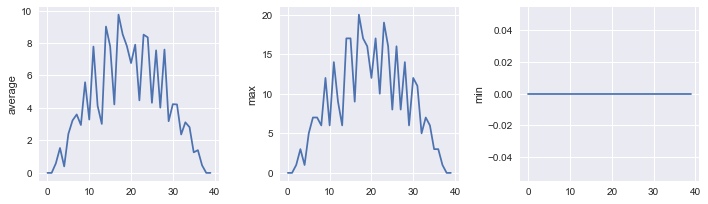

data/inflammation-12.csv


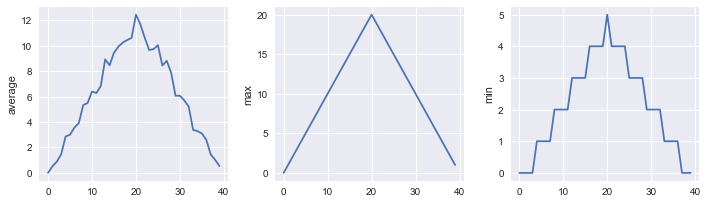

In [6]:
filenames = [os.path.join('data', f) for f in os.listdir('data')
             if f.startswith('inflammation')]

for f in filenames:
    print(f)

    data = np.loadtxt(fname=f, delimiter=',')

    fig = matplotlib.pyplot.figure(figsize=(10.0, 3.0))

    axes1 = fig.add_subplot(1, 3, 1)
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)

    axes1.set_ylabel('average')
    axes1.plot(np.mean(data, axis=0))

    axes2.set_ylabel('max')
    axes2.plot(np.max(data, axis=0))

    axes3.set_ylabel('min')
    axes3.plot(np.min(data, axis=0))

    fig.tight_layout()
    matplotlib.pyplot.show()